In [1]:
# 任意选一个你喜欢的整数，这能帮你得到稳定的结果
seed = 9999

# 欢迎来到线性回归项目

若项目中的题目有困难没完成也没关系，我们鼓励你带着问题提交项目，评审人会给予你诸多帮助。

所有选做题都可以不做，不影响项目通过。如果你做了，那么项目评审会帮你批改，也会因为选做部分做错而判定为不通过。

其中非代码题可以提交手写后扫描的 pdf 文件，或使用 Latex 在文档中直接回答。

# 1 矩阵运算

## 1.1 创建一个 4*4 的单位矩阵

In [2]:
# 这个项目设计来帮你熟悉 python list 和线性代数
# 你不能调用任何NumPy以及相关的科学计算库来完成作业


# 本项目要求矩阵统一使用二维列表表示，如下：
A = [[1,2,3], 
     [2,3,3], 
     [1,2,5]]

B = [[1,2,3,5], 
     [2,3,3,5], 
     [1,2,5,1]]

# 向量也用二维列表表示
C = [[1],
     [2],
     [3]]

#TODO 创建一个 4*4 单位矩阵
I = [[x == y and 1 or 0 for x in xrange(4)] for y in xrange(4)]

## 1.2 返回矩阵的行数和列数

In [3]:
# TODO 返回矩阵的行数和列数
def shape(M):
    # 判断是否合法
    try:
        r = len(M)
        c_list = [len(elem) for elem in M]
    except TypeError:
        raise Exception('矩阵不合法')

    # 判断是否合法
    if c_list:
        if max(c_list) == min(c_list):
            c = c_list[0]
        else:
            raise Exception('矩阵不合法')
    else:
        c = 0

    return r, c

In [4]:
# 运行以下代码测试你的 shape 函数
%run -i -e test.py LinearRegressionTestCase.test_shape

.
----------------------------------------------------------------------
Ran 1 test in 0.002s

OK


## 1.3 每个元素四舍五入到特定小数数位

In [5]:
# TODO 每个元素四舍五入到特定小数数位
# 直接修改参数矩阵，无返回值
def matxRound(M, decPts=4):
    r, c = shape(M)
    for l in xrange(r):
        for i in xrange(c):
            M[l][i] = round(M[l][i], decPts)

In [6]:
# 运行以下代码测试你的 matxRound 函数
%run -i -e test.py LinearRegressionTestCase.test_matxRound

.
----------------------------------------------------------------------
Ran 1 test in 0.083s

OK


## 1.4 计算矩阵的转置

In [7]:
# TODO 计算矩阵的转置
def transpose(M):
    return [list(col) for col in zip(*M)]

a = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
transpose(a)

# *M 把矩阵解压出来变成zip([1, 2, 3], [4, 5, 6], [7, 8, 9])
# 这样 for col in zip(*M) 的话，就是迭代出每列的元素，(1, 4, 7) , (2, 5, 8), (3, 6, 9)
# 最后再用list(col)转成数组形式[1, 4, 7], [2, 5, 8], [3, 6, 9]


[[1, 4, 7], [2, 5, 8], [3, 6, 9]]

In [8]:
# 运行以下代码测试你的 transpose 函数
%run -i -e test.py LinearRegressionTestCase.test_transpose

.
----------------------------------------------------------------------
Ran 1 test in 0.014s

OK


## 1.5 计算矩阵乘法 AB

In [9]:
# TODO 计算矩阵乘法 AB，如果无法相乘则raise ValueError
def matxMultiply(A, B):
    def sum_row_multiply(list_a, list_b):
        return sum([elem_a*elem_b for elem_a, elem_b in zip(list_a, list_b)])
    r_a, c_a = shape(A)
    r_b, c_b = shape(B)
    if c_a != r_b:
        raise ValueError
    Bt = transpose(B)
    return [[sum(elem_a*elem_b for elem_a, elem_b in zip(row, col)) for col in Bt] for row in A]


a = [[1, 2, 3], 
     [2, 3, 4]]
b = [[1, 2],
     [3, 4],
     [5, 6]]
print(matxMultiply(a, b))

[[22, 28], [31, 40]]


In [10]:
# 运行以下代码测试你的 matxMultiply 函数
%run -i -e test.py LinearRegressionTestCase.test_matxMultiply

.
----------------------------------------------------------------------
Ran 1 test in 0.105s

OK


In [11]:
# TODO 构造增广矩阵，假设A，b行数相同
def augmentMatrix(A, b):
    return [row_a + row_b for row_a, row_b in zip(A, b)]

In [12]:
# 运行以下代码测试你的 augmentMatrix 函数
%run -i -e test.py LinearRegressionTestCase.test_augmentMatrix

.
----------------------------------------------------------------------
Ran 1 test in 0.008s

OK


---

# 2 Gaussign Jordan 消元法

## 2.1 构造增广矩阵

$ A = \begin{bmatrix}
    a_{11}    & a_{12} & ... & a_{1n}\\
    a_{21}    & a_{22} & ... & a_{2n}\\
    a_{31}    & a_{22} & ... & a_{3n}\\
    ...    & ... & ... & ...\\
    a_{n1}    & a_{n2} & ... & a_{nn}\\
\end{bmatrix} , b = \begin{bmatrix}
    b_{1}  \\
    b_{2}  \\
    b_{3}  \\
    ...    \\
    b_{n}  \\
\end{bmatrix}$

返回 $ Ab = \begin{bmatrix}
    a_{11}    & a_{12} & ... & a_{1n} & b_{1}\\
    a_{21}    & a_{22} & ... & a_{2n} & b_{2}\\
    a_{31}    & a_{22} & ... & a_{3n} & b_{3}\\
    ...    & ... & ... & ...& ...\\
    a_{n1}    & a_{n2} & ... & a_{nn} & b_{n} \end{bmatrix}$

## 2.2 初等行变换
- 交换两行
- 把某行乘以一个非零常数
- 把某行加上另一行的若干倍：

In [13]:
# TODO r1 <---> r2
# 直接修改参数矩阵，无返回值
def swapRows(M, r1, r2):
    M[r1],M[r2] = M[r2],M[r1]

In [14]:
# 运行以下代码测试你的 swapRows 函数
%run -i -e test.py LinearRegressionTestCase.test_swapRows

.
----------------------------------------------------------------------
Ran 1 test in 0.004s

OK


In [15]:
# TODO r1 <--- r1 * scale
# scale为0是非法输入，要求 raise ValueError
# 直接修改参数矩阵，无返回值
def scaleRow(M, r, scale):
    if scale == 0:
        raise ValueError
    for i in xrange(len(M[r])):
        M[r][i] = M[r][i] * scale

In [16]:
# 运行以下代码测试你的 scaleRow 函数
%run -i -e test.py LinearRegressionTestCase.test_scaleRow

.
----------------------------------------------------------------------
Ran 1 test in 0.005s

OK


In [17]:
# TODO r1 <--- r1 + r2*scale
# 直接修改参数矩阵，无返回值
def addScaledRow(M, r1, r2, scale):
    for i in xrange(len(M[r1])):
        M[r1][i] += M[r2][i] * scale

In [18]:
# 运行以下代码测试你的 addScaledRow 函数
%run -i -e test.py LinearRegressionTestCase.test_addScaledRow

.
----------------------------------------------------------------------
Ran 1 test in 0.005s

OK


## 2.3  Gaussian Jordan 消元法求解 Ax = b

### 2.3.1 算法

步骤1 检查A，b是否行数相同

步骤2 构造增广矩阵Ab

步骤3 逐列转换Ab为化简行阶梯形矩阵 [中文维基链接](https://zh.wikipedia.org/wiki/%E9%98%B6%E6%A2%AF%E5%BD%A2%E7%9F%A9%E9%98%B5#.E5.8C.96.E7.AE.80.E5.90.8E.E7.9A.84-.7Bzh-hans:.E8.A1.8C.3B_zh-hant:.E5.88.97.3B.7D-.E9.98.B6.E6.A2.AF.E5.BD.A2.E7.9F.A9.E9.98.B5)
    
    对于Ab的每一列（最后一列除外）
        当前列为列c
        寻找列c中 对角线以及对角线以下所有元素（行 c~N）的绝对值的最大值
        如果绝对值最大值为0
            那么A为奇异矩阵，返回None (你可以在选做问题2.4中证明为什么这里A一定是奇异矩阵)
        否则
            使用第一个行变换，将绝对值最大值所在行交换到对角线元素所在行（行c） 
            使用第二个行变换，将列c的对角线元素缩放为1
            多次使用第三个行变换，将列c的其他元素消为0
            
步骤4 返回Ab的最后一列

**注：** 我们并没有按照常规方法先把矩阵转化为行阶梯形矩阵，再转换为化简行阶梯形矩阵，而是一步到位。如果你熟悉常规方法的话，可以思考一下两者的等价性。

### 2.3.2 算法推演

为了充分了解Gaussian Jordan消元法的计算流程，请根据Gaussian Jordan消元法，分别手动推演矩阵A为***可逆矩阵***，矩阵A为***奇异矩阵***两种情况。

In [19]:
# 不要修改这里！
from helper import *

A = generateMatrix(4,seed,singular=False)
b = np.ones(shape=(4,1)) # it doesn't matter
Ab = augmentMatrix(A.tolist(),b.tolist()) # please make sure you already correct implement augmentMatrix
printInMatrixFormat(Ab,padding=4,truncating=0)

   7,   5,   3,  -5 ||  1  
  -4,   6,   2,  -2 ||  1  
  -9,   4,  -5,   9 ||  1  
  -9, -10,   5,  -4 ||  1  


请按照算法的步骤3，逐步推演***可逆矩阵***的变换。

在下面列出每一次循环体执行之后的增广矩阵。

要求：
1. 做分数运算
2. 使用`\frac{n}{m}`来渲染分数，如下：
 - $\frac{n}{m}$
 - $-\frac{a}{b}$

增广矩阵
$ Ab = \begin{bmatrix}
    7 & 5 & 3 & -5 & 1\\
    -4 & 6 & 2 & -2 & 1\\
    -9 & 4 & -5 & 9 & 1\\
    -9 & -10 & 5 & -4 & 1\end{bmatrix}$

$ --> \begin{bmatrix}
    1 & \frac{5}{7} & \frac{3}{7} & \frac{-5}{7} & \frac{1}{7}\\
    0 & \frac{62}{7} & \frac{26}{7} & \frac{-34}{7} & \frac{11}{7}\\
    0 & \frac{73}{7} & \frac{-8}{7} & \frac{18}{7} & \frac{16}{7}\\
    0 & \frac{-25}{7} & \frac{62}{7} & \frac{-73}{7} & \frac{16}{7}\end{bmatrix}$

$ --> \begin{bmatrix}
    1 & 0 & \frac{4}{31} & \frac{-10}{31} & \frac{1}{62}\\
    0 & 1 & \frac{13}{31} & \frac{-17}{31} & \frac{11}{62}\\
    0 & 0 & \frac{-171}{31} & \frac{257}{31} & \frac{27}{62}\\
    0 & 0 & \frac{321}{31} & \frac{-384}{31} & \frac{181}{62}\end{bmatrix}$

$ --> \begin{bmatrix}
    1 & 0 & 0 & \frac{-22}{171} & \frac{1}{38}\\
    0 & 1 & 0 & \frac{14}{171} & \frac{4}{19}\\
    0 & 0 & 1 & \frac{-257}{171} & \frac{-3}{38}\\
    0 & 0 & 0 & \frac{181}{57} & \frac{71}{19}\end{bmatrix}$


$ --> \begin{bmatrix}
    1 & 0 & 0 & 0 & \frac{193}{1086}\\
    0 & 1 & 0 & 0 & \frac{62}{543}\\
    0 & 0 & 1 & 0 & \frac{1835}{1086}\\
    0 & 0 & 0 & 1 & \frac{213}{181}\end{bmatrix}$

    
$...$

In [25]:
# 不要修改这里！
A = generateMatrix(4,seed,singular=True)
b = np.ones(shape=(4,1)) # it doesn't matter
Ab = augmentMatrix(A.tolist(),b.tolist()) # please make sure you already correct implement augmentMatrix
printInMatrixFormat(Ab,padding=4,truncating=0)

  -7,  -3,   1,  -9 ||  1  
   0,   0,   0,   0 ||  1  
  -2,   7,   7,  -3 ||  1  
   8,  -5,  -6,   3 ||  1  


请按照算法的步骤3，逐步推演***奇异矩阵***的变换。

在下面列出每一次循环体执行之后的增广矩阵。

要求：
1. 做分数运算
2. 使用`\frac{n}{m}`来渲染分数，如下：
 - $\frac{n}{m}$
 - $-\frac{a}{b}$

增广矩阵
$ Ab = \begin{bmatrix}
    -7 & -3 & 1 & -9 & 1\\
    0 & 0 & 0 & 0 & 1\\
    -2 & 7 & 7 & -3 & 1\\
    8 & -5 & -6 & 3 & 1\end{bmatrix}$

$ --> \begin{bmatrix}
    1 & \frac{3}{7} & \frac{-1}{7} & \frac{9}{7} & \frac{-1}{7}\\
    0 & 0 & 0 & 0 & 1\\
    0 & \frac{55}{7} & \frac{47}{7} & \frac{-3}{7} & \frac{5}{7}\\
    0 & \frac{-59}{7} & \frac{-34}{7} & \frac{-51}{7} & \frac{15}{7}\end{bmatrix}$
    
$ --> \begin{bmatrix}
    1 & 0 & \frac{-28}{55} & \frac{72}{55} & \frac{-2}{11}\\
    0 & 1 & \frac{47}{55} & \frac{-3}{55} & \frac{1}{11}\\
    0 & 0 & 0 & 0 & 1\\
    0 & 0 & \frac{129}{55} & \frac{-426}{55} & \frac{32}{11}\end{bmatrix}$

$ --> \begin{bmatrix}
    1 & 0 & 0 & \frac{-16}{43} & \frac{58}{129}\\
    0 & 1 & 0 & \frac{119}{43} & \frac{-125}{129}\\
    0 & 0 & 1 & \frac{-142}{43} & \frac{160}{129}\\
    0 & 0 & 0 & 0 & 1\end{bmatrix}$

$...$

In [58]:
# 分数形式的高斯消元法,主要用来算上边的证明题

from fractions import Fraction

def gj_Solve_fraction(A, b, epsilon=1.0e-16):
    def print_m(M):
        # 按照markdown的形式输出矩阵
        for row in M:
            new_row = []
            for elem in row:
                if elem == Fraction(0):
                    new_row.append('0')
                elif elem.denominator == 1:
                    new_row.append(str(elem.numerator))
                else:
                    frac = r'\frac{' + str(elem.numerator) + r'}{' + str(elem.denominator) + r'}'
                    new_row.append(frac)
            string = ' & '.join(new_row) + r'\\'
            print(string)
    
    def turn_the_rest_to_zero(C, nr, rows):
        # 将本行下边的行的同列的变成0
        for i in range(rows):
            if i == nr:
                pass
            else:
                scale = -Fraction(C[i][nr])
                # r1 + r2*scale
                addScaledRow(C, i, nr, scale)

    r, c = shape(A)
    rb, cb = shape(b)

    # 检查是否同行
    if r != rb:
        return None
    A = [[Fraction(elem) for elem in row] for row in A]
    b = [[Fraction(elem) for elem in row] for row in b]
    M = augmentMatrix(A, b)

    for i in range(r):  # i为当前列

        # 判断是否为零
        num = i
        while abs(M[i][i]) < epsilon:
            # 如果是零的话，零行向下换行，直到非0为止，如果换到底还是0的话，那么就是奇异矩阵
            num += 1

            if num > r-1:
                # 奇异矩阵
                return None
            else:
                swapRows(M, i, num)
        scale = Fraction(1) / M[i][i]

        # 对角元素归一
        scaleRow(M, i, scale)
        print('对角元素归一')
        print_m(M)

        # 同列归零
        turn_the_rest_to_zero(M, i, r)
        print('同列归零')
        print_m(M)
    
    # 根据b的列数进行返回
    M = [row[-cb:] for row in M]
    return M


AA = [[7, 5, 3, -5], 
      [-4, 6, 2, -2], 
      [-9, 4, -5, 9], 
      [-9, -10, 5, -4]]

AB = [[-7,  -3,   1,  -9], 
      [ 0,   0,   0,   0], 
      [-2,   7,   7,  -3], 
      [ 8,  -5,  -6,   3]]

bb = [[1], [1], [1], [1]]
# print(gj_Solve(AA, bb))
print(gj_Solve_fraction(AB, bb))

    

对角元素归一
1 & \frac{3}{7} & \frac{-1}{7} & \frac{9}{7} & \frac{-1}{7}\\
0 & 0 & 0 & 0 & 1\\
-2 & 7 & 7 & -3 & 1\\
8 & -5 & -6 & 3 & 1\\
同列归零
1 & \frac{3}{7} & \frac{-1}{7} & \frac{9}{7} & \frac{-1}{7}\\
0 & 0 & 0 & 0 & 1\\
0 & \frac{55}{7} & \frac{47}{7} & \frac{-3}{7} & \frac{5}{7}\\
0 & \frac{-59}{7} & \frac{-34}{7} & \frac{-51}{7} & \frac{15}{7}\\
对角元素归一
1 & \frac{3}{7} & \frac{-1}{7} & \frac{9}{7} & \frac{-1}{7}\\
0 & 1 & \frac{47}{55} & \frac{-3}{55} & \frac{1}{11}\\
0 & 0 & 0 & 0 & 1\\
0 & \frac{-59}{7} & \frac{-34}{7} & \frac{-51}{7} & \frac{15}{7}\\
同列归零
1 & 0 & \frac{-28}{55} & \frac{72}{55} & \frac{-2}{11}\\
0 & 1 & \frac{47}{55} & \frac{-3}{55} & \frac{1}{11}\\
0 & 0 & 0 & 0 & 1\\
0 & 0 & \frac{129}{55} & \frac{-426}{55} & \frac{32}{11}\\
对角元素归一
1 & 0 & \frac{-28}{55} & \frac{72}{55} & \frac{-2}{11}\\
0 & 1 & \frac{47}{55} & \frac{-3}{55} & \frac{1}{11}\\
0 & 0 & 1 & \frac{-142}{43} & \frac{160}{129}\\
0 & 0 & 0 & 0 & 1\\
同列归零
1 & 0 & 0 & \frac{-16}{43} & \frac{58}{129}\\
0 & 1

### 2.3.3 实现 Gaussian Jordan 消元法

In [26]:
# TODO 实现 Gaussain Jordan 方法求解 Ax = b

""" Gaussian Jordan 方法求解 Ax = b.
    参数
        A: 方阵 
        b: 列向量
        decPts: 四舍五入位数，默认为4
        epsilon: 判读是否为0的阈值，默认 1.0e-16
        
    返回列向量 x 使得 Ax = b 
    返回None，如果 A，b 高度不同
    返回None，如果 A 为奇异矩阵
"""

def gj_Solve(A, b, decPts=4, epsilon=1.0e-16):
    def turn_the_rest_to_zero(C, nr, rows):
        # 将本行下边的行的同列的变成0
        for i in range(rows):
            if i == nr:
                pass
            else:
                scale = -C[i][nr]
                # r1 + r2*scale
                addScaledRow(C, i, nr, scale)

    r, c = shape(A)
    rb, cb = shape(b)

    # 检查是否同行
    if r != rb:
        return None
    
    M = augmentMatrix(A, b)

    matxRound(M, decPts)
    for i in range(r):  # i为当前列

        # 判断是否为零
        num = i
        while abs(M[i][i]) < epsilon:
            # 如果是零的话，零行向下换行，直到非0为止，如果换到底还是0的话，那么就是奇异矩阵
            num += 1

            if num > r-1:
                # 奇异矩阵
                return None
            else:
                swapRows(M, i, num)

        scale = 1 / M[i][i]

        # 对角元素归一
        scaleRow(M, i, scale)

        # 同列归零
        turn_the_rest_to_zero(M, i, r)
    
    # 根据b的列数进行返回
    M = [row[-cb:] for row in M]
    matxRound(M, decPts)
    return M


AA = [[7, 5, 3, -5], 
      [-4, 6, 2, -2], 
      [-9, 4, -5, 9], 
      [-9, -10, 5, -4]]
bb = [[1], [1], [1], [1]]
print(gj_Solve(AA, bb))


[[0.1777], [0.1142], [1.6897], [1.1768]]


In [27]:
# 运行以下代码测试你的 gj_Solve 函数
%run -i -e test.py LinearRegressionTestCase.test_gj_Solve

.
----------------------------------------------------------------------
Ran 1 test in 4.364s

OK


## (选做) 2.4 算法正确判断了奇异矩阵：

在算法的步骤3 中，如果发现某一列对角线和对角线以下所有元素都为0，那么则断定这个矩阵为奇异矩阵。

我们用正式的语言描述这个命题，并证明为真。

证明下面的命题：

**如果方阵 A 可以被分为4个部分: ** 

$ A = \begin{bmatrix}
    I    & X \\
    Z    & Y \\
\end{bmatrix} , \text{其中 I 为单位矩阵，Z 为全0矩阵，Y 的第一列全0}$，

**那么A为奇异矩阵。**

提示：从多种角度都可以完成证明
- 考虑矩阵 Y 和 矩阵 A 的秩
- 考虑矩阵 Y 和 矩阵 A 的行列式
- 考虑矩阵 A 的某一列是其他列的线性组合

TODO 证明：

# 3  线性回归

## 3.1 随机生成样本点

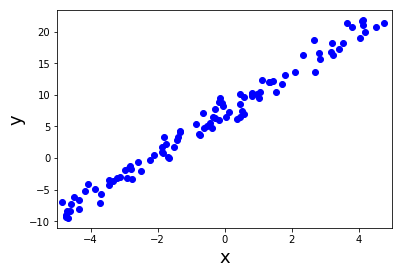

In [28]:
# 不要修改这里！
# 运行一次就够了！
from helper import *
from matplotlib import pyplot as plt
%matplotlib inline

X,Y = generatePoints(seed,num=100)

## 可视化
plt.xlim((-5,5))
plt.xlabel('x',fontsize=18)
plt.ylabel('y',fontsize=18)
plt.scatter(X,Y,c='b')
plt.show()

## 3.2 拟合一条直线

### 3.2.1 猜测一条直线

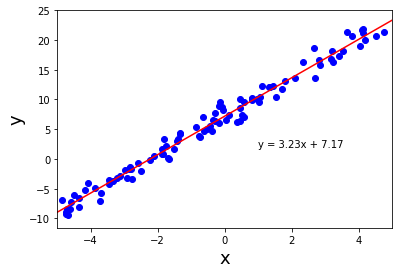

In [34]:
#TODO 请选择最适合的直线 y = mx + b
m = 3.23
b = 7.17

# 不要修改这里！
plt.xlim((-5,5))
x_vals = plt.axes().get_xlim()
y_vals = [m*x+b for x in x_vals]
plt.plot(x_vals, y_vals, '-', color='r')

plt.xlabel('x',fontsize=18)
plt.ylabel('y',fontsize=18)
plt.scatter(X,Y,c='b')
plt.text(1,2,'y = {m}x + {b}'.format(m=m,b=b))

plt.show()

### 3.2.2 计算平均平方误差 (MSE)

我们要编程计算所选直线的平均平方误差(MSE), 即数据集中每个点到直线的Y方向距离的平方的平均数，表达式如下：
$$
MSE = \frac{1}{n}\sum_{i=1}^{n}{(y_i - mx_i - b)^2}
$$

In [30]:
# TODO 实现以下函数并输出所选直线的MSE

def calculateMSE(X,Y,m,b):
    sum_list = [(y - m * x - b)**2 for x, y in zip(X, Y)]
    return sum(sum_list)/len(sum_list)

print(calculateMSE(X,Y,m,b))

1.35562442635


### 3.2.3 调整参数 $m, b$ 来获得最小的平方平均误差

你可以调整3.2.1中的参数 $m,b$ 让蓝点均匀覆盖在红线周围，然后微调 $m, b$ 让MSE最小。

## 3.3 (选做) 找到参数 $m, b$ 使得平方平均误差最小

**这一部分需要简单的微积分知识(  $ (x^2)' = 2x $ )。因为这是一个线性代数项目，所以设为选做。**

刚刚我们手动调节参数，尝试找到最小的平方平均误差。下面我们要精确得求解 $m, b$ 使得平方平均误差最小。

定义目标函数 $E$ 为
$$
E = \frac{1}{2}\sum_{i=1}^{n}{(y_i - mx_i - b)^2}
$$

因为 $E = \frac{n}{2}MSE$, 所以 $E$ 取到最小值时，$MSE$ 也取到最小值。要找到 $E$ 的最小值，即要找到 $m, b$ 使得 $E$ 相对于 $m$, $E$ 相对于 $b$ 的偏导数等于0. 

因此我们要解下面的方程组。

$$
\begin{cases}
\displaystyle
\frac{\partial E}{\partial m} =0 \\
\\
\displaystyle
\frac{\partial E}{\partial b} =0 \\
\end{cases}
$$

### 3.3.1 计算目标函数相对于参数的导数
首先我们计算两个式子左边的值

证明/计算：
$$
\frac{\partial E}{\partial m} = \sum_{i=1}^{n}{-x_i(y_i - mx_i - b)}
$$

$$
\frac{\partial E}{\partial b} = \sum_{i=1}^{n}{-(y_i - mx_i - b)}
$$

TODO 证明:

### 3.3.2 实例推演

现在我们有了一个二元二次方程组

$$
\begin{cases}
\displaystyle
\sum_{i=1}^{n}{-x_i(y_i - mx_i - b)} =0 \\
\\
\displaystyle
\sum_{i=1}^{n}{-(y_i - mx_i - b)} =0 \\
\end{cases}
$$

为了加强理解，我们用一个实际例子演练。

我们要用三个点 $(1,1), (2,2), (3,2)$ 来拟合一条直线 y = m*x + b, 请写出

- 目标函数 $E$, 
- 二元二次方程组，
- 并求解最优参数 $m, b$

TODO 写出目标函数，方程组和最优参数

### 3.3.3 将方程组写成矩阵形式

我们的二元二次方程组可以用更简洁的矩阵形式表达，将方程组写成矩阵形式更有利于我们使用 Gaussian Jordan 消元法求解。

请证明 
$$
\begin{bmatrix}
    \frac{\partial E}{\partial m} \\
    \frac{\partial E}{\partial b} 
\end{bmatrix} = X^TXh - X^TY
$$

其中向量 $Y$, 矩阵 $X$ 和 向量 $h$ 分别为 :
$$
Y =  \begin{bmatrix}
    y_1 \\
    y_2 \\
    ... \\
    y_n
\end{bmatrix}
,
X =  \begin{bmatrix}
    x_1 & 1 \\
    x_2 & 1\\
    ... & ...\\
    x_n & 1 \\
\end{bmatrix},
h =  \begin{bmatrix}
    m \\
    b \\
\end{bmatrix}
$$

TODO 证明:

至此我们知道，通过求解方程 $X^TXh = X^TY$ 来找到最优参数。这个方程十分重要，他有一个名字叫做 **Normal Equation**，也有直观的几何意义。你可以在 [子空间投影](http://open.163.com/movie/2010/11/J/U/M6V0BQC4M_M6V2AJLJU.html) 和 [投影矩阵与最小二乘](http://open.163.com/movie/2010/11/P/U/M6V0BQC4M_M6V2AOJPU.html) 看到更多关于这个方程的内容。

### 3.4 求解 $X^TXh = X^TY$ 

在3.3 中，我们知道线性回归问题等价于求解 $X^TXh = X^TY$ (如果你选择不做3.3，就勇敢的相信吧，哈哈)

In [31]:
# TODO 实现线性回归
'''
参数：X, Y
返回：m，b
'''

def linearRegression(X,Y):
    # 将X,Y转成标准的矩阵形式
    M_X = [[x, 1] for x in X]
    M_Y = [[y] for y in Y]
    
    # 求X^T
    t_X = transpose(M_X)
    
    # 求X^T * X
    a = matxMultiply(t_X, M_X)
    
    # 求X^T * Y
    b = matxMultiply(t_X, M_Y)
    
    # 求a 的逆矩阵
    a_ = gj_Solve(a, [[1, 0], [0, 1]])
    
    h = matxMultiply(a_, b)
    matxRound(h, 4)
    return h[0][0], h[1][0]

m,b = linearRegression(X,Y)
print(m,b)

(3.2254, 7.2834)


你求得的回归结果是什么？
请使用运行以下代码将它画出来。

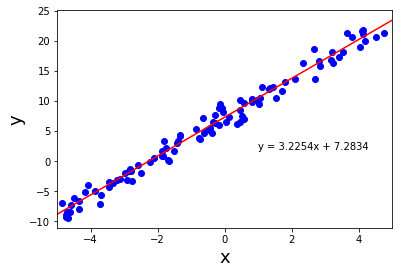

In [32]:
# 请不要修改下面的代码
x1,x2 = -5,5
y1,y2 = x1*m+b, x2*m+b

plt.xlim((-5,5))
plt.xlabel('x',fontsize=18)
plt.ylabel('y',fontsize=18)
plt.scatter(X,Y,c='b')
plt.plot((x1,x2),(y1,y2),'r')
plt.text(1,2,'y = {m}x + {b}'.format(m=m,b=b))
plt.show()

你求得的回归结果对当前数据集的MSE是多少？

In [33]:
print(calculateMSE(X,Y,m,b))

1.36587704558
